In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target

In [3]:
df = get_data(2016)

In [15]:
df

,ein,pn,eir,sb_plan_type_code,part_cnt_2016,fndng_tgt_2016,tgt_nrml_cost_2016,fndng_tgt_2017,part_cnt_2017,type_pension_bnft_code,plan_name,sponsor_dfe_name,pmts_to_part_2016,tot_pmts_2016,data_year
0,560486957,1,6.13,1,120,8762488,388723.0,9572818,127,1A,T. W. GARNER FOOD COMPANY EMPLOYEES' PENSION PLAN,T. W. GARNER FOOD COMPANY,343620.0,343620.0,2016
1,640220550,2,5.91,1,483,23158633,0.0,23584078,480,1A1I,RENASANT BANK AMENDED AND RESTATED PENSION PLAN,RENASANT BANK,2022193.0,2022193.0,2016
2,580254510,1,6.11,1,25631,1588239082,9200000.0,1587936621,23333,1A3H,GENUINE PARTS COMPANY PENSION PLAN,GENUINE PARTS COMPANY,138227658.0,138227658.0,2016
3,251538192,2,6.01,1,207,1298395,103952.0,1512716,229,1A1C1D,BURNS WHITE DEFINED BENEFIT PLAN,BURNS WHITE LLC,15395.0,15395.0,2016
4,510377325,2,6.02,1,803,21312047,260000.0,21003436,634,1A1I,TOWNSENDS COMBINED PENSION PLAN,THE INDIAN RIVER TRUST,1950582.0,1950582.0,2016
5,237211935,2,6.04,1,195,20142543,0.0,20409984,190,1A1F1I,FINANCIAL ACCOUNTING FOUNDATION EMPLOYEES' PEN...,FINANCIAL ACCOUNTING FOUNDATION,1237598.0,1237598.0,2016
6,630363853,1,6.18,1,142,8771228,427192.0,9761419,148,1A1C,LEGACY COMMUNITY FEDERAL CREDIT UNION CASH BAL...,LEGACY COMMUNITY FEDERAL CREDIT UNION,225365.0,225365.0,2016
7,161015782,1,6.00,1,113,10161550,84000.0,10220223,111,1A1I,PENSION PLAN OF UNITED WAY OF GREATER ROCHESTE...,"UNITED WAY OF GREATER ROCHESTER, INC.",720278.0,720278.0,2016
8,363081482,3,6.08,1,135,6468315,859290.0,7917338,142,1A1C,RGA CASH BALANCE PLAN,"ROCKFORD GASTROENTEROLOGY ASSOCIATES, LTD.",64857.0,64857.0,2016
9,522168499,4,6.09,1,224,11044211,0.0,11385755,222,1A3H,AMERICAN PSYCHIATRIC ASSOCIATION PENSION PLAN,AMERICAN PSYCHIATRIC ASSOCIATION,512727.0,512727.0,2016


In [ ]:
df.info()

<h1>Data Clean Up and Parsing</h1>

<h3>Convert counts to numeric, divide EIR by 100 if applicable<br>
Add pay_related, cash_bal, frozen, pbgc_takeover, not_qual indicators<br>
Restrict analysis to: </h3>
<h5><ul><li>active participant count between 100 and 300,000
        <li>funding target non-zero
        <li>filing as tax qualified
    </ul></h5>
<h3>Drop na </h3>

In [4]:
df_clean = clean_data(df,2016)

In [ ]:
df_clean.info()

In [5]:
X = get_feats(df_clean, 2016)
y = get_target(df_clean, 2016)

In [ ]:
X = df_clean[['eir', 'part_cnt_2016', 'fndng_tgt_2016', 'tgt_nrml_cost_2016','pmts_to_part_2016']]

y = df_clean['fndng_tgt_2017']

<h1>Regression Tree</h1>

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [7]:
dtr_depth2 = DecisionTreeRegressor(max_depth=2)
dtr_depth3 = DecisionTreeRegressor(max_depth=3)
dtr_depth4 = DecisionTreeRegressor(max_depth=4)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=12)

In [9]:
dtr_depth2.fit(X_train,y_train)
dtr_depth3.fit(X_train,y_train)
dtr_depth4.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
y_1 = dtr_depth2.predict(X_test)
y_2 = dtr_depth3.predict(X_test)
y_3 = dtr_depth4.predict(X_test)

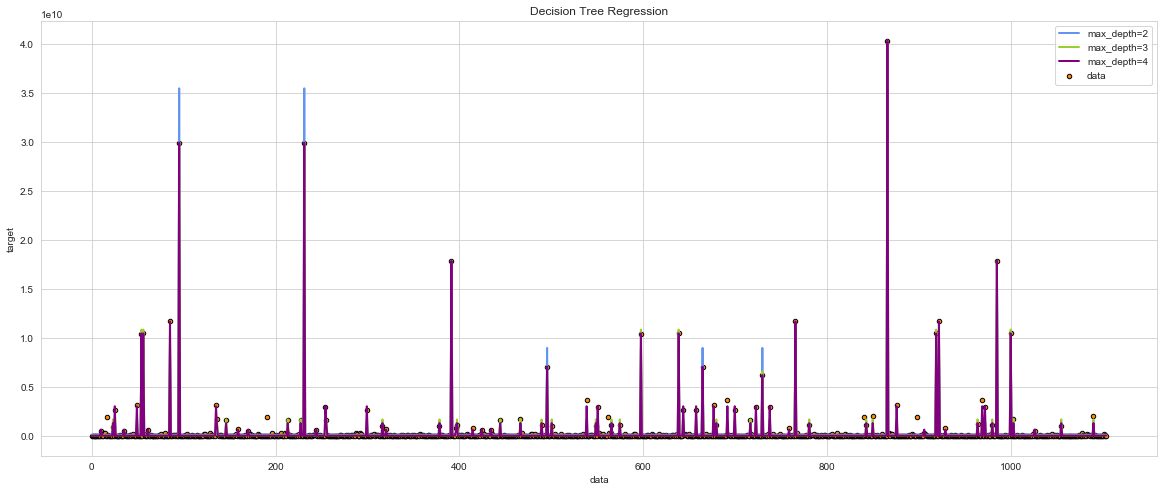

In [11]:
plt.figure(figsize=(20,8))
xx = np.linspace(0, len(X_test), num=len(X_test))
plt.scatter(xx, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(xx, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(xx, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(xx, y_3, color="purple", label="max_depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [12]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2.score(X_test,y_test), dtr_depth3.score(X_test,y_test), dtr_depth4.score(X_test,y_test)))

Regression Trees: 
Max Depth 2: 0.933580824114414
Max Depth 3: 0.9868631416284426
Max Depth 4: 0.9947757469547864


<h3>Train on entire 2016 data</h3>

In [13]:
dtr_depth2_2016 = DecisionTreeRegressor(max_depth=2)
dtr_depth3_2016 = DecisionTreeRegressor(max_depth=3)
dtr_depth4_2016 = DecisionTreeRegressor(max_depth=4)

In [14]:
dtr_depth2_2016.fit(X,y)
dtr_depth3_2016.fit(X,y)
dtr_depth4_2016.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<h3>Test on 2015 data</h3>

In [16]:
df15 = get_data(2015)

In [17]:
df15_clean = clean_data(df15,2015)

In [22]:
X15 = get_feats(df15_clean,2015)
y15 = get_target(df15_clean,2015)

In [23]:
X15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42760 entries, 0 to 44157
Data columns (total 5 columns):
eir                   42760 non-null float64
part_cnt_2015         42760 non-null int64
fndng_tgt_2015        42760 non-null int64
tgt_nrml_cost_2015    42760 non-null float64
pmts_to_part_2015     42760 non-null float64
dtypes: float64(3), int64(2)
memory usage: 2.0 MB


In [25]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2_2016.score(X15,y15), dtr_depth3_2016.score(X15,y15), dtr_depth4_2016.score(X15,y15)))

Regression Trees: 
Max Depth 2: 0.6950621266429242
Max Depth 3: 0.8362684642715394
Max Depth 4: 0.9119229185672413


In [ ]:
y_1_15 = dtr1.predict(X15)
y_2_15 = dtr2.predict(X15)

In [ ]:
plt.figure(figsize=(20,8))
xx = np.linspace(0, len(X15), num=len(X15))
plt.scatter(xx, y15, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(xx, y_1_15, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(xx, y_2_15, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()